In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [5]:
dataset["salary"].fillna(0,inplace=True) #In order to replace Nan with 0, added this 
dataset.isnull().sum()


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:

dataset

#Salary is missing only for students who are not placed. Since these Candidates have no salary,
#replacing NaN with 0 is appropriate to represent the absence of salary
# Data Preprocessing guidelines
# 1. Check for Missing Values, Outliers -> Both should not be there
# 2. if required based on Condition, Replace Missing Values(Nan) with Mean, median , mode
# 3. W.r.t Problem data replace Missing Values


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


#2. Find How many of them are not placed?

In [7]:
status_counts = dataset['status'].value_counts()
print("--- Placement Status Counts ---")
print(status_counts)
# Total - 67 Candidates  are not Placed

--- Placement Status Counts ---
status
Placed        148
Not Placed     67
Name: count, dtype: int64


#3. Find the reason for non placement from the dataset?

In [8]:
# #Split the dataset
placed = dataset[dataset['status'] == 'Placed']
not_placed = dataset[dataset['status'] == 'Not Placed']

print("\n--- Work Experience Comparison ---")
dataset.groupby('status')[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean()

# Here the dataset is split into "Placed" and "Not Placed" groups to perform a Compararison to find out what is the reason for nonplacement
# From this result I can see the reason for Non placement data is, their Mean Scores Calculated shows lower than Placed Students in 'ssc_p','hsc_p','degree_p','etest_p','mba_p'
#These lower academic scores are the primary reasons for non-placement



--- Work Experience Comparison ---


,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836
Placed,71.721486,69.926554,68.740541,73.238041,62.579392


#4.What kind of relation between salary and mba_p

In [9]:
dataset.corr(numeric_only=True)
# Correlation Results
# Correlation between mba_p and Salary is 0.13 , looks like a Positive Correlation 
# This is positive (greater than 0), meaning that as a student's MBA percentage goes up, their salary has a slight tendency to go up as well.
# correlation of 0.13 is very close to 0
#This means the relationship is negligible or very weak. MBA percentage is also not a strong factor in determining the final salary amount.

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


#5.Which specialization is getting minimum salary?

In [10]:
# First, filter to only get placed students
placed_data = dataset[dataset['salary'] > 0]

# We are comparing TWO variables: 'specialisation' and 'salary'
min_salary_by_specialisation = placed_data.groupby('specialisation')['salary'].min()
print(min_salary_by_specialisation)

#Mkt&Fin and Mkt&HR  - are the specialization's with minimum Salary
# Approach - 
# Took a the placed data where i considered Salary as > '0'
# Used the groupby to groupby specialisation and salary , then used the min() -Central Tendency to verify the min salary from the specialization column

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64


#6. How many of them getting above 500000 salary?

In [11]:
count_above_500k_by_spec = dataset[dataset['salary'] > 500000].groupby('specialisation').size()

print(count_above_500k_by_spec)

# Total 3 had salary over 500000 , i have grouped by specialisation
# Used .size() to count the rows in each group

specialisation
Mkt&Fin    3
dtype: int64


#7.Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [12]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

# In our result
# p-value = 4.67e-21
# α = 0.05
# Since the p-value is less than 0.05, we Reject H₀.

# Final Conclusion
# There is a significant difference in etest_p scores.

F_onewayResult(statistic=np.float64(98.64487057324708), pvalue=np.float64(4.672547689133573e-21))

#8.Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


In [13]:

#Importing the T-Test Function
from scipy.stats import ttest_ind

# Extracting salaries for 'Sci&Tech' degree holders
deg_sci=dataset[dataset['degree_t']=='Sci&Tech']['salary']

# Extracting salaries for 'Mkt&HR' specialisation holders
spec_mkt=dataset[dataset['specialisation']=='Mkt&HR']['salary']

#function call
print(ttest_ind(deg_sci,spec_mkt))

#Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)
# ANOVA results
f_statistic = 2.692041243555374
p_value = 0.007897969943471179

# Significance level
alpha = 0.05  # 5%

# Decision based on the p-value
if p_value <= alpha:
    decision = "Reject the null hypothesis: There is a significant difference in salaries."
else:
    decision = "Fail to reject the null hypothesis: No significant difference in salaries."

print(decision)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))
Reject the null hypothesis: There is a significant difference in salaries.


#9. Convert the normal distribution to standard normal distribution for salary column

In [14]:
placed_dataset = dataset[dataset['salary'] > 0]

In [15]:
# We calculate the mean (μ) and standard deviation (σ)
# using ONLY the placed students' salaries.
mean_salary = placed_dataset['salary'].mean()
std_dev_salary = placed_dataset['salary'].std()
print(f"Mean: {mean_salary}, Std Dev: {std_dev_salary}")

Mean: 288655.4054054054, Std Dev: 93457.45241958875


In [16]:
#Z = (X - μ) / σ

In [17]:
placed_dataset['salary_zscore'] = (placed_dataset['salary'] - mean_salary) / std_dev_salary
print(placed_dataset[['salary', 'salary_zscore']])

       salary  salary_zscore
0    270000.0      -0.199614
1    200000.0      -0.948618
2    250000.0      -0.413615
4    425000.0       1.458895
7    252000.0      -0.392215
..        ...            ...
209  216000.0      -0.777417
210  400000.0       1.191393
211  275000.0      -0.146114
212  295000.0       0.067888
213  204000.0      -0.905818

[148 rows x 2 columns]


In [18]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values =[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

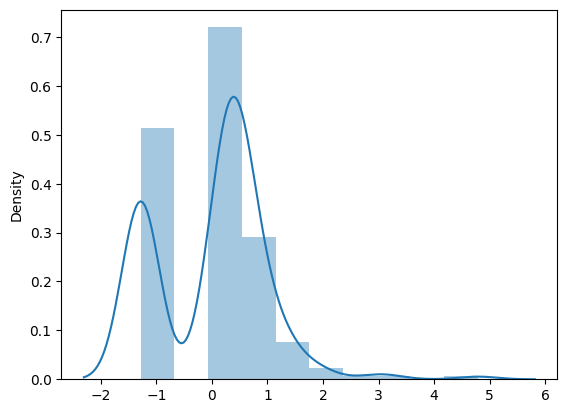

In [19]:
stdNBgraph(dataset['salary'])

#10.What is the probability Density Function of the salary range from 700000 to 900000?

In [20]:
#Calculate the Parameters
# To use the normal distribution, we need two numbers:
#   - Mean (μ): The center of the curve (average salary).
#   - Std Dev (σ): How spread out the curve is.

mean_salary = placed_dataset['salary'].mean()
std_dev_salary = placed_dataset['salary'].std()

#Calculate the Probability using CDF
# We want the range: 700,000 to 900,000
# Probability of salary < 900,000
from scipy.stats import norm
prob_less_than_900k = norm.cdf(900000, mean_salary, std_dev_salary)
print(prob_less_than_900k)

# Probability of salary < 700,000
prob_less_than_700k = norm.cdf(700000, mean_salary, std_dev_salary)
print(prob_less_than_700k)

#Find the Difference
# The probability of being BETWEEN 700k and 900k is the difference.
probability_range = prob_less_than_900k - prob_less_than_700k

print(f"Probability: {probability_range}")

#to find the probability of a range (from A to B), we  use the Cumulative Distribution Function (CDF).PDF: 
#Tells  the height of the curve at one specific point.CDF: Tells you the area under the curve up to a point (which represents probability).
#Since we need the probability for a range ($700k - 900k$), calculating the area (CDF) is the correct  approach.

0.9999999999695316
0.9999946225237726
Probability: 5.377445759013888e-06


#11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using HypothesisTesting)


In [21]:
import pandas as pd
from scipy.stats import ttest_rel

#  analyze students whose degree type is 'Sci&Tech'
scitech_students = dataset[dataset['degree_t'] == 'Sci&Tech']

#Run the Paired T-Test
# compare two columns (etest_p and mba_p) from the SAME group of students.
# This is why we use 'ttest_rel' (related/paired samples), not 'ttest_ind'.
t_statistic, p_value = ttest_rel(scitech_students['etest_p'], scitech_students['mba_p'])

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("H0 - Reject Null Hypothesis. There is a significant difference.")
else:
    print("H1 - Accept Null Hypothesis. There is no significant difference.")

T-Statistic: 5.0049844583693615
P-Value: 5.517920600505392e-06
H0 - Reject Null Hypothesis. There is a significant difference.


#12.Which parameter is highly correlated with salary?

In [24]:
dataset.corr(numeric_only=True)

# 1. Filter the dataset to only include placed students (salary > 0)
placed_dataset = dataset[dataset['salary'] > 0]

# 2. Calculate correlation with salary for all numerical columns
correlation_with_salary = placed_dataset.corr(numeric_only=True)['salary'].drop('salary')

# 3. Sort and print the results
print(correlation_with_salary.sort_values(ascending=False))

# The parameter most highly correlated with salary is etest_p , with a correlation of 0.1783


etest_p     0.178307
mba_p       0.175013
hsc_p       0.076819
sl_no       0.063764
ssc_p       0.035330
degree_p   -0.019272
Name: salary, dtype: float64


#13) plot any useful graph and explain it.

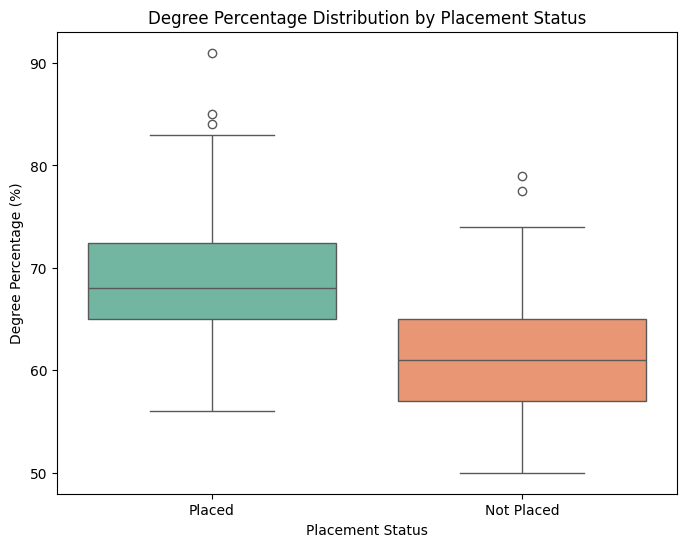

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 6))

# Create a Box Plot
sns.boxplot(x='status', y='degree_p', data=dataset, palette="Set2")

plt.title('Degree Percentage Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Degree Percentage (%)')
plt.show()